In [ ]:
#Input: Difference in L and R value of encoder
#Output: D and Theta value. To be extracted from ground truth coordinates
#50% training and test data split
#RMSE error with respect to ground truth
#Graph plot of Ground Truth, DeadReckoning, Alive Reckoning

In [ ]:
#%matplotlib notebook
import cv2
import glob
import pickle
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import plotly.graph_objects as go

In [ ]:
skip_training = False
device = torch.device('cpu')
#device = torch.device('cuda:0')

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

os.chdir("/content/drive/My Drive/Alive_Reckoning")
!ls

Mounted at /content/drive
1_mlp_pytorch.ipynb			  DR_1000
Alive_Reckoning_manual_GroundTruth.ipynb  Images
Alive_Reckoning_manual_prediction.ipynb   particle_filter_mean_1000.txt
AliveReckoning_MLP			  particle_filter_mean.txt
Alive-Reckoning_mlp.ipynb		  robot4_motors.txt
DR					  robot4_reference.txt


In [ ]:
#Collect Input and output

In [ ]:
def GetOutputData():

  #Read the data and store it in array
  val = []
  D = []
  THETA = []
  with open('robot4_reference.txt') as f:
    for i in range(278):
      lines = f.readline()
      lines = lines.split()
      val.append(lines[2:])

  #Convert stored data from string to integer

  for j in range(278):
    for k in range(2):
      val[j][k] = float(val[j][k])

  #Prepare D and THETA list
  for j in range(277):
    y = (val[j+1][1] - val[j][1]) 
    x = (val[j+1][0] - val[j][0])
    d = np.sqrt(y**2 + x**2)
    theta = np.arctan2(y,x)
    D.append(d)
    THETA.append(theta)

  return D, THETA



In [ ]:
def GetInputData():
  
  left_list = []
  right_list = []
  diff_L = []
  diff_R = []
  f = open("robot4_motors.txt")
   
  for l in f:
    sp = l.split()
    left_list.append(int(sp[2]))
    right_list.append(int(sp[6]))
  
  for i in range(len(left_list)-1):
    diff_L.append(left_list[i+1] - left_list[i])
    diff_R.append(right_list[i+1] - right_list[i])

  return diff_L, diff_R
  

In [ ]:
dl,dr = GetInputData()
d,theta = GetOutputData()
# fig = go.Figure(data=[go.Scatter3d(x=dl, y=dr, z=theta,
#                                    mode='markers')])
# fig.show()

In [ ]:
print(dl[12:-1])
print(dr[12:-1])

[71, 127, 129, 129, 0, 128, 128, 129, 128, 0, 129, 128, 0, 129, 128, 129, 128, 129, 0, 128, 129, 129, 0, 128, 128, 129, 129, 0, 128, 128, 129, 0, 128, 129, 129, 130, 0, 128, 129, 128, 0, 129, 128, 129, 0, 128, 129, 125, 106, 0, 108, 107, 107, 107, 0, 106, 108, 105, 108, 0, 91, 85, 86, 0, 84, 86, 86, 0, 85, 86, 86, 86, 0, 85, 85, 86, 0, 120, 128, 129, 127, 0, 128, 129, 130, 129, 0, 128, 127, 129, 0, 128, 129, 128, 129, 0, 123, 108, 90, 0, 86, 84, 87, 0, 85, 86, 86, 67, 0, 64, 65, 65, 0, 65, 64, 64, 86, 0, 130, 127, 128, 0, 131, 128, 129, 0, 127, 128, 129, 128, 129, 0, 129, 128, 129, 0, 127, 90, 54, 43, 0, 44, 43, 43, 0, 43, 43, 43, 43, 0, 43, 44, 112, 0, 127, 128, 129, 127, 0, 129, 129, 128, 129, 0, 110, 107, 107, 0, 107, 108, 106, 0, 104, 86, 85, 85, 0, 87, 85, 86, 110, 0, 128, 128, 127, 0, 129, 127, 129, 129, 0, 128, 112, 107, 0, 106, 108, 106, 0, 92, 86, 85, 95, 0, 129, 127, 113, 107, 0, 107, 108, 107, 0, 107, 106, 109, 105, 0, 108, 108, 108, 0, 106, 107, 108, 106, 0, 114, 129, 129, 

<function matplotlib.pyplot.show>

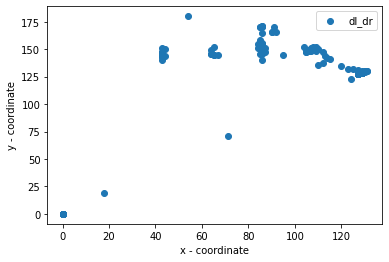

In [ ]:
plt.scatter(dl[12:-1], dr[12:-1], label = "dl_dr")#Ground Truth
#plt.plot(x_GT_, y_GT_, label = "Ground Truth_MLP")#Ground Truth
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

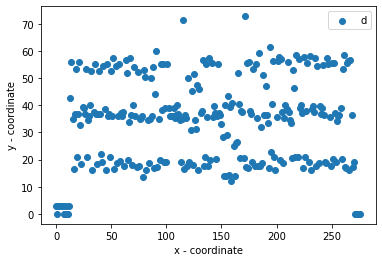

In [ ]:
x = range(0,len(d))
plt.scatter(x, d, label = "d")#Ground Truth
#plt.plot(x_GT_, y_GT_, label = "Ground Truth_MLP")#Ground Truth
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.legend()
plt.show

In [ ]:
dtheta = []
for j in range(1,len(theta)):
  dtheta.append(theta[j]-theta[j-1])



<function matplotlib.pyplot.show>

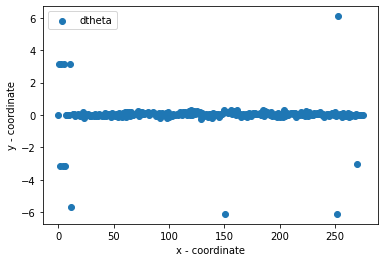

In [ ]:
x = range(0,len(dtheta))
plt.scatter(x, dtheta, label = "dtheta")#Ground Truth
#plt.plot(x_GT_, y_GT_, label = "Ground Truth_MLP")#Ground Truth
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

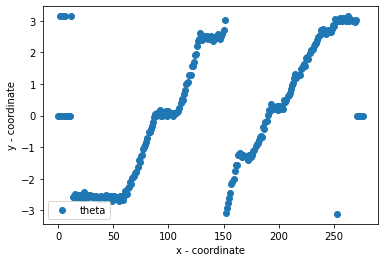

In [ ]:
x = range(0,len(theta))
plt.scatter(x, theta, label = "theta")#Ground Truth
#plt.plot(x_GT_, y_GT_, label = "Ground Truth_MLP")#Ground Truth
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.legend()
plt.show

In [ ]:
fig = go.Figure(data=[go.Scatter3d(x=dl, y=dr, z=theta,
                                   mode='markers')])
fig.update_layout(scene = dict(
                    xaxis_title='DL',
                    yaxis_title='DR',
                    zaxis_title='Theta'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()

In [ ]:
fig = go.Figure(data=[go.Scatter3d(x=dl, y=dr, z=dtheta,
                                   mode='markers')])
fig.update_layout(scene = dict(
                    xaxis_title='DL',
                    yaxis_title='DR',
                    zaxis_title='D_Theta'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()

In [ ]:
fig = go.Figure(data=[go.Scatter3d(x=dl, y=dr, z=d,
                                   mode='markers')])
fig.update_layout(scene = dict(
                    xaxis_title='DL',
                    yaxis_title='DR',
                    zaxis_title='Distance'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()

In [ ]:
#Function for converting input and output to suitable format
def Convert_to_Tensor(data):
  data = torch.tensor(np.array(data))
  data = data.to(torch.double)
  #data = torch.reshape(data, (data.shape[0], 1, 1, data.shape[1]))
  data = torch.reshape(data, (data.shape[0], 1))
  data = data.to(torch.float)
  data = data.to(device)

  return data

In [ ]:
#Filter out zero input from data

In [ ]:
d,t = GetOutputData()
d = Convert_to_Tensor(d)
t = Convert_to_Tensor(t)
temp = torch.concat((d,t), axis=1)
output = torch.reshape(temp, (temp.shape[0], 1, 1, temp.shape[1]))

In [ ]:
l,r = GetInputData()
l = Convert_to_Tensor(l)
r = Convert_to_Tensor(r)
temp = torch.concat((l,r), axis=1)
input = torch.reshape(temp, (temp.shape[0], 1, 1, temp.shape[1]))

In [ ]:
#split the data set in 50%
perc = 0.6
last = int(input.shape[0]*perc)

input_train = input[12:last-1]
input_test = input[last:-7]

output_train = output[12:last-1]
output_test = output[last:-7]


In [ ]:
#normalizing
output_train_norm = torch.zeros_like(output_train)
output_test_norm = torch.zeros_like(output_test)
max_output_0 = torch.max(output[:,:,:,0])
max_output_1 = torch.max(output[:,:,:,1])
output_train_norm[:,:,:,0] = output_train[:,:,:,0]/max_output_0
output_train_norm[:,:,:,1] = output_train[:,:,:,1]/max_output_1
output_test_norm[:,:,:,0] = output_test[:,:,:,0]/max_output_0
output_test_norm[:,:,:,1] = output_test[:,:,:,1]/max_output_1



In [ ]:
print(input_test.shape)
print(output_test.shape)

print(input_train.shape)
print(output_train.shape)

torch.Size([104, 1, 1, 2])
torch.Size([104, 1, 1, 2])
torch.Size([153, 1, 1, 2])
torch.Size([153, 1, 1, 2])


In [ ]:
#shuffle

#Input_train, Target_train = shuffle(train_inp, train_target, random_state=0)

In [ ]:
#Create the MLP network
from numpy.core.numeric import zeros_like
class MLP(nn.Module):
    def __init__(self, n_inputs=2):
        # YOUR CODE HERE
        super(MLP,self).__init__()
        len = 30

        l2_size = len
        l3_size = len
        l4_size = len
        l5_size = len
        l6_size = len
        l7_size = len
        l8_size = len
        l9_size = 2
        
        self.tanh = nn.Tanh()
        self.l2 = nn.Linear(n_inputs,l2_size)
        self.l3 = nn.Linear(l2_size,l3_size)
        self.l4 = nn.Linear(l3_size,l4_size)
        self.l5 = nn.Linear(l4_size,l5_size)
        self.l6 = nn.Linear(l5_size,l6_size)
        self.l7 = nn.Linear(l6_size,l7_size)
        self.l8 = nn.Linear(l7_size,l8_size)
        self.l9 = nn.Linear(l8_size,l9_size)
        
        return None

    def forward(self, x):
        """
        Args:
          x of shape (n_samples, n_inputs): Model inputs.
        
        Returns:
          y of shape (n_samples, 1): Model outputs.
        """
       
        out = self.l2(x)
        out = self.tanh(out)
        out = self.l3(out)
        out = self.tanh(out)
        out = self.l4(out)
        out = self.tanh(out)
        out = self.l5(out)
        out = self.tanh(out)
        out = self.l6(out)
        out = self.tanh(out)
        out = self.l7(out)
        out = self.tanh(out)
        out = self.l8(out)
        out = self.tanh(out)
        out = self.l9(out)
        out = self.tanh(out)

                
        return out


In [ ]:
m = MLP()
m = m.float()
m.to(device)

MLP(
  (tanh): Tanh()
  (l2): Linear(in_features=2, out_features=30, bias=True)
  (l3): Linear(in_features=30, out_features=30, bias=True)
  (l4): Linear(in_features=30, out_features=30, bias=True)
  (l5): Linear(in_features=30, out_features=30, bias=True)
  (l6): Linear(in_features=30, out_features=30, bias=True)
  (l7): Linear(in_features=30, out_features=30, bias=True)
  (l8): Linear(in_features=30, out_features=30, bias=True)
  (l9): Linear(in_features=30, out_features=2, bias=True)
)

In [ ]:
k = m(input_train[0:5])
print(k)
print(output_train_norm[0:5])

tensor([[[[-0.0843, -0.0547]]],


        [[[-0.0843, -0.0547]]],


        [[[-0.0843, -0.0547]]],


        [[[-0.0843, -0.0547]]],


        [[[-0.0845, -0.0547]]]], grad_fn=<TanhBackward0>)
tensor([[[[ 0.0412,  1.0000]]],


        [[[ 0.5868, -0.8190]]],


        [[[ 0.7697, -0.8065]]],


        [[[ 0.4808, -0.7952]]],


        [[[ 0.2286, -0.8181]]]])


In [ ]:
#RMSE error for Ground Truth, DeadReckoning, Alive Reckoning trajectory
def RMSE(inp1, inp2):
  inp1 = torch.reshape(inp1, (inp1.shape[0], inp1.shape[3]))
  inp2 = torch.reshape(inp2, (inp2.shape[0], inp2.shape[3]))
  sq_err = (inp1 - inp2)**2
  sum_err = torch.sum(sq_err)
  mean_err = torch.sum(sum_err)/inp1.shape[0]
  rmse_err = torch.sqrt(mean_err)
  
  return rmse_err

In [ ]:
#Training and testing accuracy function

In [ ]:
#Training error

def train_err():

  m.eval()
  with torch.no_grad():
    out = m(input_train)
    err = RMSE(out, output_train_norm)
    
  return err

In [ ]:
#Testing error

def test_err():

  m.eval()
  with torch.no_grad():
    out = m(input_test)
    err = RMSE(out, output_test_norm)
   
  return err

In [ ]:
#Train the network

if not skip_training:

    loss_list = []
    train_error_list = []
    test_error_list = []

    optimizer = optim.Adam(m.parameters(), lr=0.00001) 
    criterion = nn.MSELoss()
    batch_size = 10
    step = 4000
    count = int(input_train.shape[0]/batch_size)
   
    for j in range(step):
      sum = 0
      for k in range(count):

        m.train()           
        optimizer.zero_grad()
        out = m(input_train[batch_size*k:(batch_size*k)+batch_size])

        loss = criterion(out,output_train_norm[batch_size*k:(batch_size*k)+batch_size])
        loss.backward()
        optimizer.step()
        sum = sum + loss

      loss_ = sum/count
      print(loss_)
      loss_list.append(loss_)

      err_tr = train_err()
      print(err_tr)# training error
      train_error_list.append(err_tr)

      err_tst = test_err() 
      print(err_tst)# testing error
      test_error_list.append(err_tst)


Streaming output truncated to the last 5000 lines.
tensor(0.6156)
tensor(0.8401)
tensor(0.1930, grad_fn=<DivBackward0>)
tensor(0.6156)
tensor(0.8401)
tensor(0.1930, grad_fn=<DivBackward0>)
tensor(0.6156)
tensor(0.8401)
tensor(0.1930, grad_fn=<DivBackward0>)
tensor(0.6156)
tensor(0.8401)
tensor(0.1930, grad_fn=<DivBackward0>)
tensor(0.6156)
tensor(0.8401)
tensor(0.1930, grad_fn=<DivBackward0>)
tensor(0.6156)
tensor(0.8401)
tensor(0.1930, grad_fn=<DivBackward0>)
tensor(0.6156)
tensor(0.8401)
tensor(0.1930, grad_fn=<DivBackward0>)
tensor(0.6155)
tensor(0.8401)
tensor(0.1930, grad_fn=<DivBackward0>)
tensor(0.6155)
tensor(0.8401)
tensor(0.1930, grad_fn=<DivBackward0>)
tensor(0.6155)
tensor(0.8401)
tensor(0.1930, grad_fn=<DivBackward0>)
tensor(0.6155)
tensor(0.8401)
tensor(0.1930, grad_fn=<DivBackward0>)
tensor(0.6155)
tensor(0.8401)
tensor(0.1930, grad_fn=<DivBackward0>)
tensor(0.6155)
tensor(0.8401)
tensor(0.1930, grad_fn=<DivBackward0>)
tensor(0.6155)
tensor(0.8401)
tensor(0.1930, grad_fn

<function matplotlib.pyplot.show>

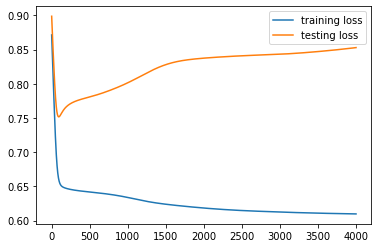

In [ ]:
#Graph plot for training and Testing loss
#Plot

x = range(len(train_error_list))
plt.plot(x, train_error_list, label = "training loss")
plt.plot(x, test_error_list, label = "testing loss")
plt.legend()
plt.show

In [ ]:
m.eval()
with torch.no_grad():
  out = m(input[12:-7])

In [ ]:
print(out[:,:,:,0]*max_output_0)


tensor([[[35.6887]],

        [[35.7960]],

        [[35.8510]],

        [[35.7985]],

        [[37.8988]],

        [[35.7973]],

        [[35.7429]],

        [[35.8510]],

        [[35.7429]],

        [[37.8988]],

        [[35.8510]],

        [[35.7429]],

        [[37.8988]],

        [[35.8510]],

        [[35.7429]],

        [[35.8510]],

        [[35.7429]],

        [[35.8510]],

        [[37.8988]],

        [[35.7429]],

        [[35.8510]],

        [[35.7985]],

        [[37.8988]],

        [[35.7973]],

        [[35.7429]],

        [[35.8510]],

        [[35.7985]],

        [[37.8988]],

        [[35.7973]],

        [[35.7429]],

        [[35.8510]],

        [[37.8988]],

        [[35.7429]],

        [[35.8510]],

        [[35.7985]],

        [[35.7997]],

        [[37.8988]],

        [[35.7429]],

        [[35.8510]],

        [[35.7429]],

        [[37.8988]],

        [[35.8510]],

        [[35.7429]],

        [[35.8510]],

        [[37.8988]],

        [[

In [ ]:
print(out[:,:,:,1]*max_output_1)

tensor([[[-0.9476]],

        [[-0.8472]],

        [[-0.8299]],

        [[-0.8436]],

        [[-0.7416]],

        [[-0.8454]],

        [[-0.8585]],

        [[-0.8299]],

        [[-0.8585]],

        [[-0.7416]],

        [[-0.8299]],

        [[-0.8585]],

        [[-0.7416]],

        [[-0.8299]],

        [[-0.8585]],

        [[-0.8299]],

        [[-0.8585]],

        [[-0.8299]],

        [[-0.7416]],

        [[-0.8585]],

        [[-0.8299]],

        [[-0.8436]],

        [[-0.7416]],

        [[-0.8454]],

        [[-0.8585]],

        [[-0.8299]],

        [[-0.8436]],

        [[-0.7416]],

        [[-0.8454]],

        [[-0.8585]],

        [[-0.8299]],

        [[-0.7416]],

        [[-0.8585]],

        [[-0.8299]],

        [[-0.8436]],

        [[-0.8418]],

        [[-0.7416]],

        [[-0.8585]],

        [[-0.8299]],

        [[-0.8585]],

        [[-0.7416]],

        [[-0.8299]],

        [[-0.8585]],

        [[-0.8299]],

        [[-0.7416]],

        [[

In [ ]:
#Graph plot for Ground Truth, DeadReckoning, Alive Reckoning trajectory
def GT_Data():
  #Read the data and store it in array
  val = []
  x_gt = []
  y_gt = []
  with open('robot4_reference.txt') as f:
    for i in range(278):
      lines = f.readline()
      lines = lines.split()
      val.append(lines[2:])

  #Convert stored data from string to integer

  for j in range(278):
    for k in range(2):
      if k == 0:
        x_gt.append(float(val[j][k]))
      if k == 1:
        y_gt.append(float(val[j][k]))

  return x_gt, y_gt

In [ ]:
x_gt, y_gt = GT_Data()

In [ ]:
def AR_Data():

  start_x = x_gt[0]
  start_y = y_gt[0]
  x_ar = []
  y_ar = []
  x_ar.append(start_x)
  y_ar.append(start_y)
  dl,dr = GetInputData()

  m.eval()
  with torch.no_grad():
    out = m(input[12:-7])

  D = torch.zeros_like(out[:,:,:,0])
  THETA = torch.zeros_like(out[:,:,:,1])
  D = out[:,:,:,0]*max_output_0
  THETA = out[:,:,:,1]*max_output_1

  for i in range(1,D.shape[0]):
    x_ar.append(x_ar[i-1] + D[i]*np.cos(THETA[i]))
    y_ar.append(y_ar[i-1] + D[i]*np.sin(THETA[i]))



  return x_ar, y_ar

In [ ]:
np.cos(-2.54)

-0.8244352886772223

In [ ]:
AR_Data()

([1850.0,
  tensor([[1873.7007]]),
  tensor([[1897.8970]]),
  tensor([[1921.6947]]),
  tensor([[1949.6400]]),
  tensor([[1973.3893]]),
  tensor([[1996.7506]]),
  tensor([[2020.9469]]),
  tensor([[2044.3082]]),
  tensor([[2072.2537]]),
  tensor([[2096.4500]]),
  tensor([[2119.8113]]),
  tensor([[2147.7566]]),
  tensor([[2171.9529]]),
  tensor([[2195.3142]]),
  tensor([[2219.5105]]),
  tensor([[2242.8718]]),
  tensor([[2267.0681]]),
  tensor([[2295.0134]]),
  tensor([[2318.3748]]),
  tensor([[2342.5710]]),
  tensor([[2366.3689]]),
  tensor([[2394.3142]]),
  tensor([[2418.0635]]),
  tensor([[2441.4248]]),
  tensor([[2465.6211]]),
  tensor([[2489.4189]]),
  tensor([[2517.3643]]),
  tensor([[2541.1135]]),
  tensor([[2564.4749]]),
  tensor([[2588.6711]]),
  tensor([[2616.6165]]),
  tensor([[2639.9778]]),
  tensor([[2664.1741]]),
  tensor([[2687.9719]]),
  tensor([[2711.8179]]),
  tensor([[2739.7632]]),
  tensor([[2763.1245]]),
  tensor([[2787.3208]]),
  tensor([[2810.6821]]),
  tensor([[2838

<function matplotlib.pyplot.show>

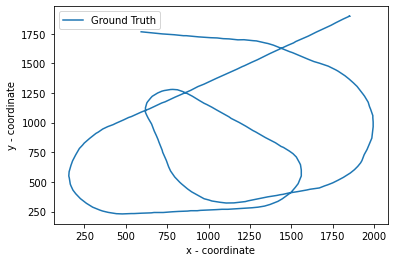

In [ ]:
plt.plot(x_gt, y_gt, label = "Ground Truth")#Ground Truth
#plt.plot(x_GT_, y_GT_, label = "Ground Truth_MLP")#Ground Truth
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.legend()
plt.show